In [209]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns
from datetime import datetime

# Set data files
americans_sleep_data_file = "/Users/jennabarkley/Desktop/resources/2003-2017_time americans_spend_sleeping.csv"
employee_attrition_data_file = "/Users/jennabarkley/Desktop/resources/employee_attrition.csv"
sleep_efficiency_data_file = "/Users/jennabarkley/Desktop/resources/2021 sleep_efficiency.csv"
male_sleep_data_file = "/Users/jennabarkley/Desktop/resources/20191001-20200731_male_sleep.csv"
female_sleep_data_file = "/Users/jennabarkley/Desktop/resources/20191015-20200729_jb_fitbit_sleep.csv"


# Read data files
americans_sleep = pd.read_csv(americans_sleep_data_file)
employee_attrition = pd.read_csv(employee_attrition_data_file)
sleep_efficiency = pd.read_csv(sleep_efficiency_data_file)
male_sleep = pd.read_csv(male_sleep_data_file)
female_sleep = pd.read_csv(female_sleep_data_file)


In [210]:
# look at sleep_efficiency values
sleep_efficiency.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [211]:
# check for null values
sleep_efficiency.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [212]:
# drop columns with null values that aren't useful
sleep_efficiency.drop(columns=["ID","Caffeine consumption","Alcohol consumption","Smoking status","Exercise frequency"],inplace=True)
sleep_efficiency.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0


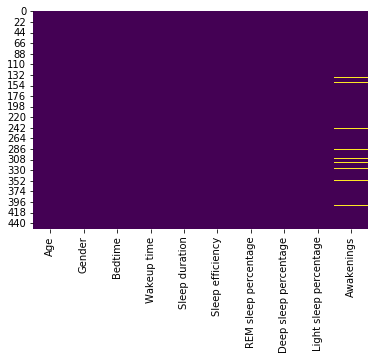

In [213]:
# check to see the amount of data that is missing to make decisions whether to drop these missing values or to replace them
sns.heatmap(sleep_efficiency.isnull(),cbar=False,cmap='viridis')

In [214]:
# replace missing values with mean
num_col = ['Awakenings']
for col in num_col:
    sleep_efficiency[col]=pd.to_numeric(sleep_efficiency[col])
    sleep_efficiency[col].fillna(sleep_efficiency[col].mean(), inplace=True)
sleep_efficiency.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0


In [215]:
# check if any null values remain
sleep_efficiency.isnull().sum()

Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
dtype: int64

In [216]:
# split date and time in the Bedtime column
se_st = sleep_efficiency["Bedtime"]
se_split = se_st.str.split(expand=True)
se_split.columns = ['startDate', 'startTime']
se_split.head()

,startDate,startTime
0,2021-03-06,01:00:00
1,2021-12-05,02:00:00
2,2021-05-25,21:30:00
3,2021-11-03,02:30:00
4,2021-03-13,01:00:00


In [217]:
# split date and time in the Wakeup time column
se_et = sleep_efficiency["Wakeup time"]
wt_split = se_et.str.split(expand=True)
wt_split.columns = ['endDate', 'endTime']
wt_split.head()

,endDate,endTime
0,2021-03-06,07:00:00
1,2021-12-05,09:00:00
2,2021-05-25,05:30:00
3,2021-11-03,08:30:00
4,2021-03-13,09:00:00


In [218]:
# create a new dataframe for split columns
se_split_df = pd.DataFrame().assign(startDate=se_split['startDate'],startTime=se_split['startTime'],endDate=wt_split['endDate'],\
                                 endTime=wt_split['endTime'],)
se_split_df.head()

,startDate,startTime,endDate,endTime
0,2021-03-06,01:00:00,2021-03-06,07:00:00
1,2021-12-05,02:00:00,2021-12-05,09:00:00
2,2021-05-25,21:30:00,2021-05-25,05:30:00
3,2021-11-03,02:30:00,2021-11-03,08:30:00
4,2021-03-13,01:00:00,2021-03-13,09:00:00


In [219]:
# drop old start/end time columns
sleep_efficiency.drop(columns=["Bedtime","Wakeup time"],inplace=True)
sleep_efficiency.head()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
0,65,Female,6.0,0.88,18,70,12,0.0
1,69,Male,7.0,0.66,19,28,53,3.0
2,40,Female,8.0,0.89,20,70,10,1.0
3,40,Female,6.0,0.51,23,25,52,3.0
4,57,Male,8.0,0.76,27,55,18,3.0


In [220]:
# create new dataframe with new split columns
sleep_efficiency_new = pd.DataFrame().assign(Age=sleep_efficiency['Age'], Gender=sleep_efficiency['Gender'],\
                                        SleepDuration=sleep_efficiency['Sleep efficiency'], REMSleepPerc=sleep_efficiency['REM sleep percentage'],\
                                        DeepSleepPerc=sleep_efficiency['Deep sleep percentage'],LightSleepPerc=sleep_efficiency['Light sleep percentage'],\
                                        Awakenings=sleep_efficiency['Awakenings'], StartDate=se_split['startDate'],StartTime=se_split['startTime'],\
                                        EndDate=wt_split['endDate'],EndTime=wt_split['endTime']
                                        )
sleep_efficiency_new.head()

,Age,Gender,SleepDuration,REMSleepPerc,DeepSleepPerc,LightSleepPerc,Awakenings,StartDate,StartTime,EndDate,EndTime
0,65,Female,0.88,18,70,12,0.0,2021-03-06,01:00:00,2021-03-06,07:00:00
1,69,Male,0.66,19,28,53,3.0,2021-12-05,02:00:00,2021-12-05,09:00:00
2,40,Female,0.89,20,70,10,1.0,2021-05-25,21:30:00,2021-05-25,05:30:00
3,40,Female,0.51,23,25,52,3.0,2021-11-03,02:30:00,2021-11-03,08:30:00
4,57,Male,0.76,27,55,18,3.0,2021-03-13,01:00:00,2021-03-13,09:00:00


In [221]:
# look at employee_attrition values
employee_attrition.head()

,Age,Gender,PerformanceRating,Attrition,JobSatisfaction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Female,3,Yes,4,Travel_Rarely,1102,Sales,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Male,4,No,2,Travel_Frequently,279,Research & Development,8,1,...,4,80,1,10,3,3,10,7,1,7
2,37,Male,3,Yes,3,Travel_Rarely,1373,Research & Development,2,2,...,2,80,0,7,3,3,0,0,0,0
3,33,Female,3,No,3,Travel_Frequently,1392,Research & Development,3,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Male,3,No,2,Travel_Rarely,591,Research & Development,2,1,...,4,80,1,6,3,3,2,2,2,2


In [222]:
# check for null values
employee_attrition.isnull().sum()

Age                         0
Gender                      0
PerformanceRating           0
Attrition                   0
JobSatisfaction             0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [223]:
# drop columns that aren't useful
employee_attrition.drop(columns=["BusinessTravel","DailyRate","EmployeeCount","EmployeeNumber",
                                 "HourlyRate","JobInvolvement","JobLevel","MonthlyIncome",
                                 "MonthlyRate","NumCompaniesWorked","Over18","PercentSalaryHike",
                                 "RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear",
                                 "YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"],inplace=True)
employee_attrition.head()

,Age,Gender,PerformanceRating,Attrition,JobSatisfaction,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobRole,MaritalStatus,OverTime,StandardHours,WorkLifeBalance
0,41,Female,3,Yes,4,Sales,1,2,Life Sciences,2,Sales Executive,Single,Yes,80,1
1,49,Male,4,No,2,Research & Development,8,1,Life Sciences,3,Research Scientist,Married,No,80,3
2,37,Male,3,Yes,3,Research & Development,2,2,Other,4,Laboratory Technician,Single,Yes,80,3
3,33,Female,3,No,3,Research & Development,3,4,Life Sciences,4,Research Scientist,Married,Yes,80,3
4,27,Male,3,No,2,Research & Development,2,1,Medical,1,Laboratory Technician,Married,No,80,3


In [224]:
# look at americans_sleep values
americans_sleep.head()

,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both


In [225]:
americans_sleep["Type of Days"].unique()

array(['All days', 'Nonholiday weekdays', 'Weekend days and holidays'],
      dtype=object)

In [226]:
# remove Sex=Both
am_sleep_mf = americans_sleep[americans_sleep["Sex"]!="Both"]

Year                         15
Period                        1
Avg hrs per day sleeping    204
Standard Error              149
Type of Days                  3
Age Group                     7
Activity                      1
Sex                           2
dtype: int64

In [227]:
# remove Age Group=15 years and over
am_sleep_sx = am_sleep_mf[am_sleep_mf["Age Group"]!="15 years and over"]

Year                         15
Period                        1
Avg hrs per day sleeping    200
Standard Error              125
Type of Days                  3
Age Group                     6
Activity                      1
Sex                           2
dtype: int64

## Average sleep on Weekends versus Weekdays

In [240]:
am_avg_weekends = am_sleep_sx[am_sleep_sx["Type of Days"]== "Weekend days and holidays"]
am_avg_weekends["Avg hrs per day sleeping"].mean()

9.333166666666665

In [244]:
am_avg_weekdays = am_sleep_sx[am_sleep_sx["Type of Days"]== "Nonholiday weekdays"]
am_avg_weekdays["Avg hrs per day sleeping"].mean()

8.403999999999998

In [229]:
# look at "Age Group" values and consider making bins based off these values
am_sleep_sx["Age Group"].unique()

array(['15 to 24 years', '25 to 34 years', '35 to 44 years',
       '45 to 54 years', '55 to 64 years', '65 years and over'],
      dtype=object)

In [230]:
# employee_attrition bins
bins = [0,25,35,45,55,65,100]
labels = ['15 to 24 years', '25 to 34 years', '35 to 44 years',\
          '45 to 54 years', '55 to 64 years', '65 years and over']
employee_attrition["Age Group"] = pd.cut(employee_attrition["Age"], bins, labels=labels, include_lowest=True)
employee_attrition.head()

,Age,Gender,PerformanceRating,Attrition,JobSatisfaction,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobRole,MaritalStatus,OverTime,StandardHours,WorkLifeBalance,Age Group
0,41,Female,3,Yes,4,Sales,1,2,Life Sciences,2,Sales Executive,Single,Yes,80,1,35 to 44 years
1,49,Male,4,No,2,Research & Development,8,1,Life Sciences,3,Research Scientist,Married,No,80,3,45 to 54 years
2,37,Male,3,Yes,3,Research & Development,2,2,Other,4,Laboratory Technician,Single,Yes,80,3,35 to 44 years
3,33,Female,3,No,3,Research & Development,3,4,Life Sciences,4,Research Scientist,Married,Yes,80,3,25 to 34 years
4,27,Male,3,No,2,Research & Development,2,1,Medical,1,Laboratory Technician,Married,No,80,3,25 to 34 years


In [231]:
# sleep_efficiency bins
bins = [0,25,35,45,55,65,100]
labels = ['15 to 24 years', '25 to 34 years', '35 to 44 years',\
          '45 to 54 years', '55 to 64 years', '65 years and over']
sleep_efficiency["Age Group"] = pd.cut(sleep_efficiency["Age"], bins, labels=labels, include_lowest=True)
sleep_efficiency.head()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Age Group
0,65,Female,6.0,0.88,18,70,12,0.0,55 to 64 years
1,69,Male,7.0,0.66,19,28,53,3.0,65 years and over
2,40,Female,8.0,0.89,20,70,10,1.0,35 to 44 years
3,40,Female,6.0,0.51,23,25,52,3.0,35 to 44 years
4,57,Male,8.0,0.76,27,55,18,3.0,55 to 64 years


In [232]:
# look at values
female_sleep.head()

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,mainSleep
0,28233683168,7/29/20,2020-07-28 / 22:22:00.000,2020-07-29 / 06:50:00.000,30480000,0,459,49,0,508,95,stages,0,auto_detected,True
1,28221114098,7/28/20,2020-07-27 / 22:43:00.000,2020-07-28 / 05:13:00.000,23400000,0,337,53,0,390,90,stages,0,auto_detected,True
2,28209500788,7/27/20,2020-07-26 / 22:50:30.000,2020-07-27 / 05:07:00.000,22560000,0,334,42,0,376,96,stages,0,auto_detected,True
3,28197204582,7/26/20,2020-07-25 / 23:33:00.000,2020-07-26 / 08:10:30.000,31020000,0,452,65,0,517,95,stages,0,auto_detected,True
4,28180233060,7/25/20,2020-07-24 / 23:35:30.000,2020-07-25 / 08:26:30.000,31860000,0,460,71,0,531,94,stages,0,auto_detected,True


In [233]:
# split date and time in the startTime column
fem_st = female_sleep["startTime"]
st_split = fem_st.str.split("/",expand=True)
st_split.columns = ['startDate', 'startTime']
st_split

,startDate,startTime
0,2020-07-28,22:22:00.000
1,2020-07-27,22:43:00.000
2,2020-07-26,22:50:30.000
3,2020-07-25,23:33:00.000
4,2020-07-24,23:35:30.000
...,...,...
283,2019-10-22,22:26:00.000
284,2019-10-20,22:49:30.000
285,2019-10-17,21:37:30.000
286,2019-10-16,22:12:00.000


In [234]:
# split date and time in the endTime column
fem_et = female_sleep["endTime"]
et_split = fem_et.str.split("/",expand=True)
et_split.columns = ['endDate', 'endTime']
et_split

,endDate,endTime
0,2020-07-29,06:50:00.000
1,2020-07-28,05:13:00.000
2,2020-07-27,05:07:00.000
3,2020-07-26,08:10:30.000
4,2020-07-25,08:26:30.000
...,...,...
283,2019-10-23,05:38:30.000
284,2019-10-21,05:41:30.000
285,2019-10-18,05:55:30.000
286,2019-10-17,05:54:00.000


In [235]:
# create a new dataframe for split columns
split_df = pd.DataFrame().assign(startDate=st_split['startDate'],startTime=st_split['startTime'],endDate=et_split['endDate'],\
                                 endTime=et_split['endTime'],)
split_df

,startDate,startTime,endDate,endTime
0,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000
1,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000
2,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000
3,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000
4,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000
...,...,...,...,...
283,2019-10-22,22:26:00.000,2019-10-23,05:38:30.000
284,2019-10-20,22:49:30.000,2019-10-21,05:41:30.000
285,2019-10-17,21:37:30.000,2019-10-18,05:55:30.000
286,2019-10-16,22:12:00.000,2019-10-17,05:54:00.000


In [236]:
# drop old start/end time columns
female_sleep.drop(columns=["startTime","endTime"],inplace=True)
female_sleep.head()

,logId,dateOfSleep,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,mainSleep
0,28233683168,7/29/20,30480000,0,459,49,0,508,95,stages,0,auto_detected,True
1,28221114098,7/28/20,23400000,0,337,53,0,390,90,stages,0,auto_detected,True
2,28209500788,7/27/20,22560000,0,334,42,0,376,96,stages,0,auto_detected,True
3,28197204582,7/26/20,31020000,0,452,65,0,517,95,stages,0,auto_detected,True
4,28180233060,7/25/20,31860000,0,460,71,0,531,94,stages,0,auto_detected,True


In [237]:
# create new dataframe with new split columns and columns that are useful
female_sleep_new = pd.DataFrame().assign(Date=female_sleep['dateOfSleep'], MinutesAsleep=female_sleep['minutesAsleep'],\
                                        MinutesAwake=female_sleep['minutesAwake'], TimeInBed=female_sleep['timeInBed'],\
                                        Efficiency=female_sleep['efficiency'],MainSleep=female_sleep['mainSleep'],\
                                        StartDate=st_split['startDate'], StartTime=st_split['startTime'],\
                                        EndDate=et_split['endDate'],EndTime=et_split['endTime']
                                        )
female_sleep_new.head()


,Date,MinutesAsleep,MinutesAwake,TimeInBed,Efficiency,MainSleep,StartDate,StartTime,EndDate,EndTime
0,7/29/20,459,49,508,95,True,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000
1,7/28/20,337,53,390,90,True,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000
2,7/27/20,334,42,376,96,True,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000
3,7/26/20,452,65,517,95,True,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000
4,7/25/20,460,71,531,94,True,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000


In [238]:
# reorder columns
female_sleep_reorder = female_sleep_new[["Date","StartDate", "StartTime","EndDate","EndTime","MinutesAsleep","MinutesAwake",\
                                         "TimeInBed","Efficiency","MainSleep"]]
female_sleep_reorder.head()

,Date,StartDate,StartTime,EndDate,EndTime,MinutesAsleep,MinutesAwake,TimeInBed,Efficiency,MainSleep
0,7/29/20,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000,459,49,508,95,True
1,7/28/20,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000,337,53,390,90,True
2,7/27/20,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000,334,42,376,96,True
3,7/26/20,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000,452,65,517,95,True
4,7/25/20,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000,460,71,531,94,True


In [239]:
male_sleep.head()

,date,deepSleepTimeMin,shallowSleepTimeMin,wakeTimeBetweenSleepMin,start,stop,startTime,endTime,timeAsleep
0,10/1/19,116,296,66,1569892080,1569920760,1:08:00 AM,9:06:00 AM,346
1,10/2/19,173,270,0,1569975420,1570002000,12:17:00 AM,7:40:00 AM,443
2,10/3/19,132,337,0,1570061340,1570089480,12:09:00 AM,7:58:00 AM,469
3,10/4/19,149,399,0,1570147080,1570179960,11:58:00 PM,9:06:00 AM,548
4,10/5/19,108,319,0,1570237980,1570263600,1:13:00 AM,8:20:00 AM,427
